In [1]:
import os
import pandas as pd
import torch
from skimage import io
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision import transforms, utils

In [2]:
def show_img(im, ax=None, figsize=(8,8), title=None):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3) 
    ax.imshow(im);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if title: ax.set_title(title)
    return ax

In [3]:
def draw_rect(ax, xy, w, h):
    patch = ax.add_patch(patches.Rectangle(xy, w, h, fill=False, edgecolor='yellow', lw=2))
    patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground='black'), patheffects.Normal()])

In [4]:
classes= {'car':0,'van':1,'truck':2,'bus':3,'motorcycle':4} # object classes
i2c = lambda i : [k for k,v in classes.items() if v ==i] # convert values to classes
i2c(0)

['car']

In [5]:
class ToTensor(transforms.ToTensor):
    def __call__(self, inp):
        return super().__call__(inp[0]), inp[1] 

In [6]:
class ODdataset(Dataset):
    def __init__(self,csv_file, root_dir, transform=ToTensor()):
        
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        frame_name = os.path.join(self.root_dir,self.labels.iloc[idx,0])# finding the frame path
        frame = io.imread(frame_name) # reading frame
        y_cls,x,y,w,h = self.labels.iloc[idx,1:]
        y_bbox = (x,y,w,h) # bounding box coordinates             
        
            
        return frame, (torch.Tensor([y_cls]).long(), torch.Tensor(y_bbox).float())

In [7]:
# initiate datasets
test_ds= ODdataset(csv_file = 'mergedlbls.csv', root_dir = 'Frames/')


In [8]:
def show_img_bbox(x,y,ax=None):
    H,W = x.shape[1:]
    xc = y[1][0]
    yc = y[1][1]
    w = y[1][2]
    h = y[1][3]
    xtl = xc-w/2
    ytl = yc-w/2
    ax = show_img(x, ax=ax, title=i2c(y[0])[0])
    draw_rect(ax, [xtl, ytl], w, h)

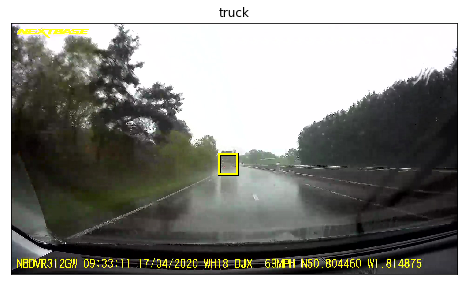

In [10]:
x,y =test_ds[18]
show_img_bbox(x,y)